In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset

df = pd.read_table('train.ft.txt')
df.head()

,__label__2 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,__label__2 The best soundtrack ever to anythin...
1,__label__2 Amazing!: This soundtrack is my fav...
2,__label__2 Excellent Soundtrack: I truly like ...
3,"__label__2 Remember, Pull Your Jaw Off The Flo..."
4,__label__2 an absolute masterpiece: I am quite...


In [4]:
df.shape

(3599999, 1)

In [5]:
# Changing column name

df.columns = ['review']

In [6]:
df.head(2)

,review
0,__label__2 The best soundtrack ever to anythin...
1,__label__2 Amazing!: This soundtrack is my fav...


In [7]:
df = df[:5000]

In [7]:
df.shape

(5000, 1)

In [8]:
df.nunique()

review    5000
dtype: int64

In [9]:
# null values

df.isna().sum()

review    0
dtype: int64

### Splitting the Target Column

In [10]:
df.head()

,review
0,__label__2 The best soundtrack ever to anythin...
1,__label__2 Amazing!: This soundtrack is my fav...
2,__label__2 Excellent Soundtrack: I truly like ...
3,"__label__2 Remember, Pull Your Jaw Off The Flo..."
4,__label__2 an absolute masterpiece: I am quite...


In [9]:
data = df.review.str.split(' ', n=1, expand=True)
df['Review'] = data[1]
df['Sentiment'] = data[0]
df.drop('review',axis=1, inplace=True)
df.head()

,Review,Sentiment
0,The best soundtrack ever to anything.: I'm rea...,__label__2
1,Amazing!: This soundtrack is my favorite music...,__label__2
2,Excellent Soundtrack: I truly like this soundt...,__label__2
3,"Remember, Pull Your Jaw Off The Floor After He...",__label__2
4,an absolute masterpiece: I am quite sure any o...,__label__2


In [10]:
df['Sentiment'] = df['Sentiment'].replace({'__label__2':'Positive', '__label__1':'Negative'})

In [11]:
df.head()

,Review,Sentiment
0,The best soundtrack ever to anything.: I'm rea...,Positive
1,Amazing!: This soundtrack is my favorite music...,Positive
2,Excellent Soundtrack: I truly like this soundt...,Positive
3,"Remember, Pull Your Jaw Off The Floor After He...",Positive
4,an absolute masterpiece: I am quite sure any o...,Positive


In [12]:
X = df['Review']
y = df['Sentiment']

In [15]:
# Class imbalance Check

In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

In [14]:
df['Sentiment'].value_counts()

Negative    2692
Positive    2308
Name: Sentiment, dtype: int64

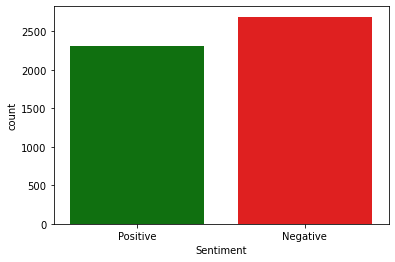

In [15]:
sns.countplot(x="Sentiment", data=df, palette=['green', 'red'])
plt.show()

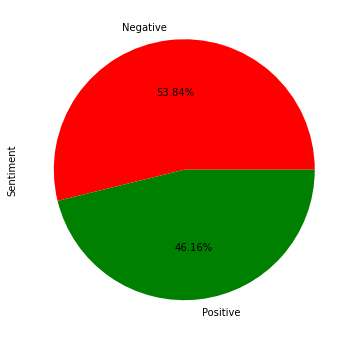

In [16]:
plt.figure(figsize=(12,6))
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['red', 'green'])
plt.show()

In [20]:
# Target class is balanced

### Word Cloud before Text Preprocessing

In [17]:
from collections import Counter

for i in df['Review']:
    coun = Counter(" ".join(df['Review']).split(" ")).items()

In [18]:
count_dict = dict(coun)

In [19]:
import operator
sorted_count = sorted(count_dict.items(),key=operator.itemgetter(1),reverse=True)
sorted_count_dict = dict(sorted_count)

In [20]:
count = dict()

i = 37
j = 17096

for key, val in sorted_count_dict.items():
    if int(val) >= i and int(val) <= j:
        count[key] = val

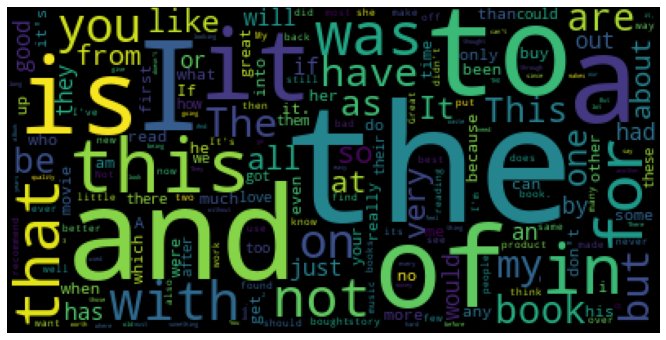

In [21]:
from wordcloud import WordCloud

%matplotlib inline


wordcloud = WordCloud(max_font_size=100)

wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Text Preprocessing

In [22]:
import re

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neeba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\neeba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
df.head()

,Review,Sentiment
0,The best soundtrack ever to anything.: I'm rea...,Positive
1,Amazing!: This soundtrack is my favorite music...,Positive
2,Excellent Soundtrack: I truly like this soundt...,Positive
3,"Remember, Pull Your Jaw Off The Floor After He...",Positive
4,an absolute masterpiece: I am quite sure any o...,Positive


In [24]:
# Lowercase Conversion

X = X.str.lower()
X.head()

0    the best soundtrack ever to anything.: i'm rea...
1    amazing!: this soundtrack is my favorite music...
2    excellent soundtrack: i truly like this soundt...
3    remember, pull your jaw off the floor after he...
4    an absolute masterpiece: i am quite sure any o...
Name: Review, dtype: object

In [25]:
# Removal of Special Charcters, Numbers, stop words, lemmatizion

corpus = []
lemma = WordNetLemmatizer()

for i in range(len(X)):    
    review = re.sub('[^a-zA-Z]', ' ', X[i])
    review = review.split()
    review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

### Word Cloud after Text Preprocessing

In [26]:
df_corpus = pd.concat([pd.Series(corpus),df['Sentiment']], axis=1)

In [27]:
df_corpus = df_corpus.rename(columns={0:'Reviews'})

In [28]:
df_corpus.head()

,Reviews,Sentiment
0,best soundtrack ever anything reading lot revi...,Positive
1,amazing soundtrack favorite music time hand in...,Positive
2,excellent soundtrack truly like soundtrack enj...,Positive
3,remember pull jaw floor hearing played game kn...,Positive
4,absolute masterpiece quite sure actually takin...,Positive


In [29]:
from collections import Counter

for i in df_corpus['Reviews']:
    coun = Counter(" ".join(df_corpus['Reviews']).split(" ")).items()

In [30]:
count_dict = dict(coun)

In [31]:
import operator
sorted_count = sorted(count_dict.items(),key=operator.itemgetter(1),reverse=True)
sorted_count_dict = dict(sorted_count)

In [32]:
count = dict()

i = 37
j = 1416

for key, val in sorted_count_dict.items():
    if int(val) >= i and int(val) <= j:
        count[key] = val

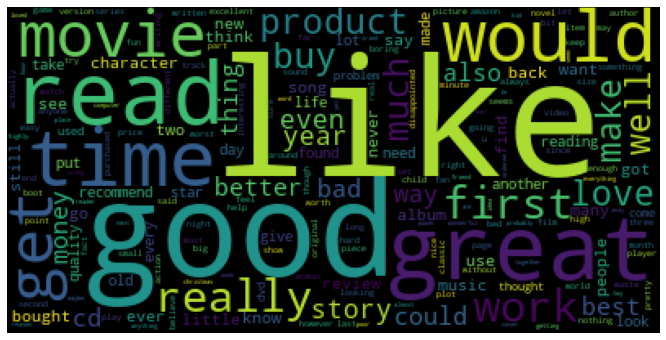

In [33]:
from wordcloud import WordCloud

%matplotlib inline


wordcloud = WordCloud(max_font_size=100)

wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Word Cloud for Positive Reviews

In [34]:
df_positive = df_corpus[df_corpus['Sentiment'] == 'Positive']

In [35]:
df_positive.head()

,Reviews,Sentiment
0,best soundtrack ever anything reading lot revi...,Positive
1,amazing soundtrack favorite music time hand in...,Positive
2,excellent soundtrack truly like soundtrack enj...,Positive
3,remember pull jaw floor hearing played game kn...,Positive
4,absolute masterpiece quite sure actually takin...,Positive


In [36]:
from collections import Counter

for i in df_positive['Reviews']:
    coun = Counter(" ".join(df_positive['Reviews']).split(" ")).items()

In [37]:
count_dict = dict(coun)

In [38]:
import operator
sorted_count = sorted(count_dict.items(),key=operator.itemgetter(1),reverse=True)
sorted_count_dict = dict(sorted_count)

In [39]:
count = dict()

i = 20
j = 1648

for key, val in sorted_count_dict.items():
    if int(val) >= i and int(val) <= j:
        count[key] = val

In [44]:
#%pip install wordcloud

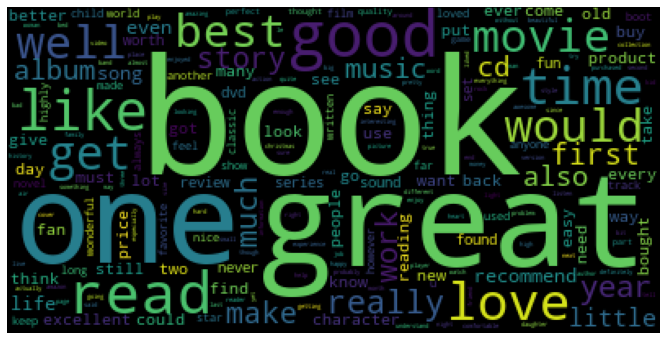

In [40]:
from wordcloud import WordCloud

%matplotlib inline


wordcloud = WordCloud(max_font_size=100)

wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#### Count plot for most frequent Positive words

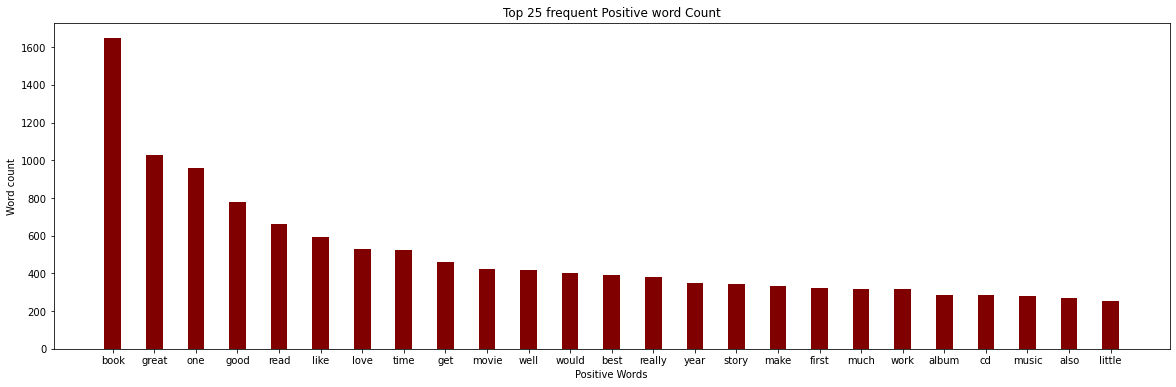

In [41]:
dict_items = sorted_count_dict.items()
first_ten_list = list(dict_items)[:25]
first_ten  = dict(first_ten_list)

words = list(first_ten.keys())
word_count = list(first_ten.values())

fig = plt.figure(figsize = (20, 6))
plt.bar(words, word_count, color ='maroon', width = 0.4)

plt.title('Top 25 frequent Positive word Count')
plt.xlabel('Positive Words')
plt.ylabel('Word count')
plt.show()

### Word CLoud for Negative Reviews

In [42]:
df_negetive = df_corpus[df_corpus['Sentiment'] == 'Negative']

In [43]:
df_negetive.head()

,Reviews,Sentiment
5,buyer beware self published book want know rea...,Negative
9,worst complete waste time typographical error ...,Negative
12,oh please guess romance novel lover one discer...,Negative
13,awful beyond belief feel write keep others was...,Negative
14,try fool u fake review glaringly obvious glowi...,Negative


In [44]:
for i in df_negetive['Reviews']:
    coun = Counter(" ".join(df_negetive['Reviews']).split(" ")).items()

In [45]:
count_dict = dict(coun)

In [46]:
sorted_count = sorted(count_dict.items(),key=operator.itemgetter(1),reverse=True)
sorted_count_dict = dict(sorted_count)

In [47]:
count = dict()

i = 21
j = 1748


for key, val in sorted_count_dict.items():
    if int(val) >= i and int(val) <= j:
        count[key] = val

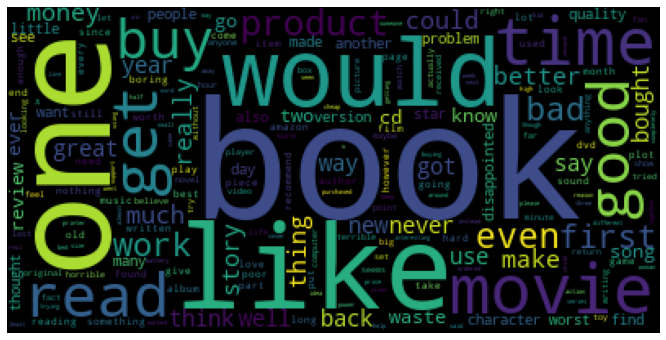

In [48]:
from wordcloud import WordCloud

%matplotlib inline


wordcloud = WordCloud(max_font_size=100)

wordcloud.generate_from_frequencies(count)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#### Count plot for most frequent Negative words

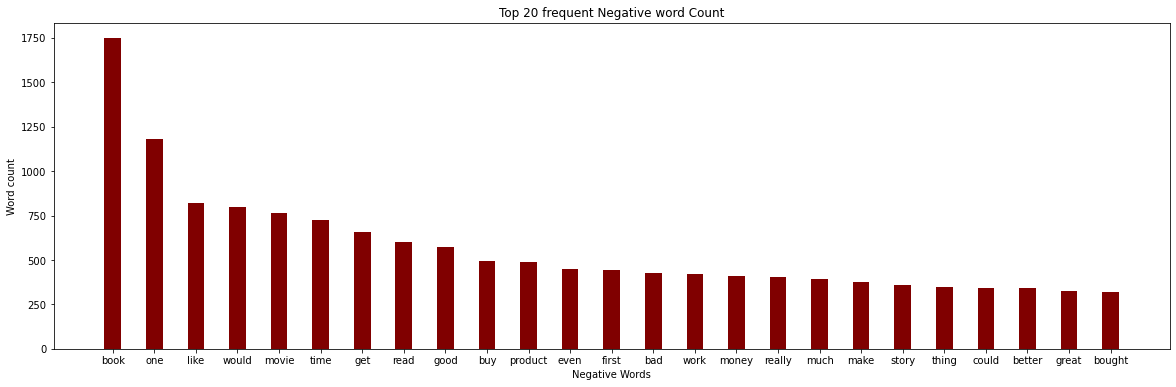

In [49]:
dict_items = sorted_count_dict.items()
first_ten_list = list(dict_items)[:25]
first_ten  = dict(first_ten_list)

words = list(first_ten.keys())
word_count = list(first_ten.values())

fig = plt.figure(figsize = (20, 6))
plt.bar(words, word_count, color ='maroon', width = 0.4)

plt.title('Top 20 frequent Negative word Count')
plt.xlabel('Negative Words')
plt.ylabel('Word count')
plt.show()

### Tokenization

In [50]:
from nltk.tokenize import word_tokenize

In [51]:
token = []

for i in corpus:
    data = word_tokenize(i)
    token.append(data)

### Vectorization

In [57]:
# Count Vectorization (Bag of Words)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_count = vectorizer.fit_transform(corpus).toarray()

In [59]:
# TFIDF

In [53]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_count).toarray()

### Base Model

#### Logistic Regression Model 

In [61]:
# Model building using Count Vectorized X

In [56]:
# Trin test Split

from sklearn.model_selection import train_test_split
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y, test_size=0.2, random_state=10)

In [63]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train_count, y_train_count)

y_pred_lr = lr_model.predict(X_test_count)

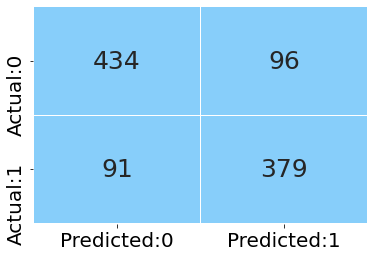

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test_count, y_pred_lr)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1']) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [65]:
from sklearn.metrics import classification_report


print(classification_report(y_test_count, y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.83      0.82      0.82       530
    Positive       0.80      0.81      0.80       470

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [66]:
y_pred_tr_lr = lr_model.predict(X_train_count)
print(classification_report(y_train_count, y_pred_tr_lr))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2162
    Positive       1.00      1.00      1.00      1838

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [67]:
# Model is over fitting

In [68]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test_count, y_pred_lr)
print('kappa value:',kappa)

kappa value: 0.6248746238716149


In [69]:
# Model building using tfidf X

In [57]:
# Trin test Split

from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=10)

In [71]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train_tfidf, y_train_tfidf)
y_pred_lr = lr_model.predict(X_test_tfidf)

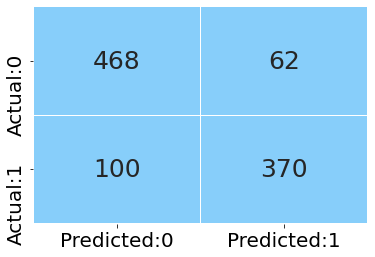

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

cm = confusion_matrix(y_test_tfidf, y_pred_lr)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1']) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [73]:
from sklearn.metrics import classification_report

print(classification_report(y_test_tfidf, y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.82      0.88      0.85       530
    Positive       0.86      0.79      0.82       470

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



In [74]:
y_pred_tr_lr = lr_model.predict(X_train_tfidf)
print(classification_report(y_train_tfidf, y_pred_tr_lr))

              precision    recall  f1-score   support

    Negative       0.93      0.96      0.95      2162
    Positive       0.95      0.92      0.93      1838

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000



In [75]:
# Model is over fitting

In [76]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test_tfidf, y_pred_lr)
print('kappa value:',kappa)

kappa value: 0.673334408775609


#### Naive Bayes

In [77]:
# Model building using Count Vectorized X

In [78]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_model = gnb.fit(X_train_count, y_train_count)
y_pred = gnb_model.predict(X_test_count)
print(classification_report(y_test_count, y_pred))

              precision    recall  f1-score   support

    Negative       0.70      0.56      0.62       530
    Positive       0.59      0.72      0.65       470

    accuracy                           0.64      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.65      0.64      0.64      1000



In [79]:
y_pred_tr = gnb_model.predict(X_train_count)
print(classification_report(y_train_count, y_pred_tr))

              precision    recall  f1-score   support

    Negative       1.00      0.89      0.94      2162
    Positive       0.88      1.00      0.94      1838

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000



In [80]:
# Model is over fitting

In [81]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test_count, y_pred)
print('kappa value:',kappa)

kappa value: 0.2820309401031338


In [82]:
# Model building using tfidf X

In [83]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_model = gnb.fit(X_train_tfidf, y_train_tfidf)
y_pred = gnb_model.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, y_pred))

              precision    recall  f1-score   support

    Negative       0.70      0.62      0.66       530
    Positive       0.62      0.69      0.65       470

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.66      0.66      0.66      1000



In [84]:
y_pred_tr = gnb_model.predict(X_train_tfidf)
print(classification_report(y_train_tfidf, y_pred_tr))

              precision    recall  f1-score   support

    Negative       1.00      0.93      0.96      2162
    Positive       0.92      1.00      0.96      1838

    accuracy                           0.96      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.96      0.96      4000



In [85]:
# Model is over fitting

In [86]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test_tfidf, y_pred)
print('kappa value:',kappa)

kappa value: 0.3122283800486424


#### Decision Tree

In [87]:
# Model building using Count Vectorized X

In [88]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
dt_model = decision_tree.fit(X_train_count, y_train_count)

In [89]:
y_pred_dt = dt_model.predict(X_test_count)
print(classification_report(y_test_count, y_pred_dt))

              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72       530
    Positive       0.68      0.69      0.68       470

    accuracy                           0.70      1000
   macro avg       0.70      0.70      0.70      1000
weighted avg       0.70      0.70      0.70      1000



In [90]:
y_pred_dt_tr = dt_model.predict(X_train_count)
print(classification_report(y_train_count, y_pred_dt_tr))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2162
    Positive       1.00      1.00      1.00      1838

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [91]:
# Model building using tfidf X

In [92]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
dt_model = decision_tree.fit(X_train_tfidf, y_train_tfidf)

In [93]:
y_pred_dt = dt_model.predict(X_test_tfidf)
print(classification_report(y_test_tfidf, y_pred_dt))

              precision    recall  f1-score   support

    Negative       0.73      0.71      0.72       530
    Positive       0.69      0.71      0.70       470

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



In [94]:
y_pred_dt_tr = dt_model.predict(X_train_tfidf)
print(classification_report(y_train_tfidf, y_pred_dt_tr))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      2162
    Positive       1.00      1.00      1.00      1838

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [ ]:
# X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf

In [58]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [59]:
LR=LogisticRegression()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
RF=RandomForestClassifier()
AB=AdaBoostClassifier()
GB=GradientBoostingClassifier()
XG=XGBClassifier()
gnb = GaussianNB()

models = []
models.append(('Logistic Regression', LR))
models.append(('Naive Bayes', gnb))
models.append(('KNN', KNN))
models.append(('Decision Tree', DT))
models.append(('Random Forest', RF))
models.append(('AdaBoost', AB))
models.append(('gradBoost', GB))
models.append(('XGBoost',XG))

In [60]:
results = []
names = []
for name, model in models:
    kfold = KFold(shuffle=True,n_splits=10,random_state=10)
    cv_results = cross_val_score(model, X_tfidf, y,cv=kfold)
    results.append(cv_results)
    names.append(name)

    print(name, 'Model')
    print()
    print('Bias Error = ', round(np.mean(1-cv_results),4))
    print('Varience Error = ', round(np.std(cv_results,ddof=1) ,4))
    
    model1=model.fit(X_train_tfidf,y_train_tfidf)
    y_pred=model1.predict(X_test_tfidf)
    y_pred_train = model1.predict(X_train_tfidf)
    
    print()
    print("Accuracy score = ",accuracy_score(y_test_tfidf,y_pred))
    print()
    print('TEST REPORT:')
    print("Classification Report \n",classification_report(y_test_tfidf,y_pred))
    print()
    print('TRAIN REPORT:')
    print(classification_report(y_train_tfidf, y_pred_train))  
    print()
    print('_'*70)

Logistic Regression Model

Bias Error =  0.16
Varience Error =  0.0177

Accuracy score =  0.844

TEST REPORT:
Classification Report 
               precision    recall  f1-score   support

    Negative       0.83      0.90      0.86       535
    Positive       0.87      0.78      0.82       465

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000


TRAIN REPORT:
              precision    recall  f1-score   support

    Negative       0.94      0.96      0.95      2157
    Positive       0.95      0.93      0.94      1843

    accuracy                           0.94      4000
   macro avg       0.95      0.94      0.94      4000
weighted avg       0.95      0.94      0.94      4000


______________________________________________________________________
Naive Bayes Model

Bias Error =  0.3518
Varience Error =  0.0224

Accuracy score =  0.656

TEST REPORT:
Classification Report

[00:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Model

Bias Error =  0.1824
Varience Error =  0.0185
[00:40:52

### Hyper Parameter tuning

In [ ]:
# Naive Bayes

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

nbModel_grid.fit(X_train_tfidf, y_train_tfidf)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=1.0)


In [61]:
gnb = GaussianNB(var_smoothing=1.0)

gnb_model = gnb.fit(X_train_tfidf ,y_train_tfidf)
y_pred = gnb_model.predict(X_test_tfidf)
print('TEST REPORT:')
print(classification_report(y_test_tfidf, y_pred))
print()
y_pred_tr = gnb_model.predict(X_train_tfidf)
print('TRAIN REPORT:')
print(classification_report(y_train_tfidf, y_pred_tr))

TEST REPORT:
              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82       535
    Positive       0.80      0.79      0.79       465

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000


TRAIN REPORT:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      2157
    Positive       0.89      0.89      0.89      1843

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [ ]:
# Random Forest

In [63]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['entropy', 'gini'],
                    'n_estimators':[10,30,50,70,90],
                    'max_depth':[10,15,20],
                    'max_features':['sqrt', 'log2'],
                    'min_samples_split':[2,5,8],
                    'min_samples_leaf':[1,5,9],
                    'max_leaf_nodes':[2,5,8]}]

random_forest =  RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator=random_forest,
                      param_grid=tuned_parameters,
                      cv=5)
rf_grid_model =  rf_grid.fit(X_train_tfidf, y_train_tfidf)
print('Best Parameters for Random Forest are ', rf_grid_model.best_params_)

Best Parameters for Random Forest are  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [64]:
rf_model = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10, 
                                 max_depth=10,
                                 max_features='sqrt',
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_leaf_nodes=8)

rf_model = rf_model.fit(X_train_tfidf ,y_train_tfidf)
y_pred = rf_model.predict(X_test_tfidf)
print('TEST REPORT:')
print(classification_report(y_test_tfidf, y_pred))
print()

y_pred_tr = gnb_model.predict(X_train_tfidf)
print('TRAIN REPORT:')
print(classification_report(y_train_tfidf, y_pred_tr))

TEST REPORT:
              precision    recall  f1-score   support

    Negative       0.59      0.95      0.73       535
    Positive       0.80      0.23      0.36       465

    accuracy                           0.62      1000
   macro avg       0.69      0.59      0.54      1000
weighted avg       0.68      0.62      0.56      1000


TRAIN REPORT:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      2157
    Positive       0.89      0.89      0.89      1843

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [ ]:
rf_model = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10, 
                                 max_depth=10,
                                 max_features='sqrt',
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_leaf_nodes=8)

rf_model = rf_model.fit(X_train_tfidf ,y_train_tfidf)
y_pred = rf_model.predict(X_test_tfidf)
print('TEST REPORT:')
print(classification_report(y_test_tfidf, y_pred))
print()

y_pred_tr = gnb_model.predict(X_train_tfidf)
print('TRAIN REPORT:')
print(classification_report(y_train_tfidf, y_pred_tr))

In [71]:
rf_tuned = RandomForestClassifier(random_state=3,n_jobs=-1)

params = {'n_estimators':np.arange(90,220,5), 'max_depth':np.arange(5,15)}

gscv = GridSearchCV(rf_tuned, param_grid = params, cv = 3,scoring='f1',n_jobs=-1,verbose=True)
gscv.fit(X_train_tfidf, y_train_tfidf)
gscv.best_params_

Fitting 3 folds for each of 260 candidates, totalling 780 fits


{'max_depth': 5, 'n_estimators': 90}

In [72]:
rf_model = RandomForestClassifier(n_estimators=90, 
                                 max_depth=5)

rf_model = rf_model.fit(X_train_tfidf ,y_train_tfidf)
y_pred = rf_model.predict(X_test_tfidf)
print('TEST REPORT:')
print(classification_report(y_test_tfidf, y_pred))
print()

y_pred_tr = gnb_model.predict(X_train_tfidf)
print('TRAIN REPORT:')
print(classification_report(y_train_tfidf, y_pred_tr))

TEST REPORT:
              precision    recall  f1-score   support

    Negative       0.56      1.00      0.72       535
    Positive       0.96      0.11      0.19       465

    accuracy                           0.58      1000
   macro avg       0.76      0.55      0.45      1000
weighted avg       0.75      0.58      0.47      1000


TRAIN REPORT:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      2157
    Positive       0.89      0.89      0.89      1843

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



### Stacking

In [68]:
from sklearn.ensemble import StackingClassifier

base_learners = [('rf_model', RandomForestClassifier(criterion='entropy',
                                 n_estimators=10, 
                                 max_depth=10,
                                 max_features='sqrt',
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_leaf_nodes=8)),
                 ('Logistic_Reg', LogisticRegression()),
                 ('AdaBoost', AdaBoostClassifier()),
                 ('NB_model', GaussianNB(var_smoothing=1.0))]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB(var_smoothing=1.0))
stack_model.fit(X_train_tfidf, y_train_tfidf)
y_pred = stack_model.predict(X_test_tfidf)

print('TEST REPORT:')
print(classification_report(y_test_tfidf, y_pred))
print()
y_pred_tr = gnb_model.predict(X_train_tfidf)
print('TRAIN REPORT:')
print(classification_report(y_train_tfidf, y_pred_tr))

TEST REPORT:
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84       535
    Positive       0.83      0.78      0.80       465

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000


TRAIN REPORT:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      2157
    Positive       0.89      0.89      0.89      1843

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [69]:
from sklearn.ensemble import StackingClassifier

base_learners = [('rf_model', RandomForestClassifier()),
                 ('Logistic_Reg', LogisticRegression()),
                 ('AdaBoost', AdaBoostClassifier()),
                 ('NB_model', GaussianNB(var_smoothing=1.0))]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB(var_smoothing=1.0))
stack_model.fit(X_train_tfidf, y_train_tfidf)
y_pred = stack_model.predict(X_test_tfidf)

print('TEST REPORT:')
print(classification_report(y_test_tfidf, y_pred))
print()
y_pred_tr = gnb_model.predict(X_train_tfidf)
print('TRAIN REPORT:')
print(classification_report(y_train_tfidf, y_pred_tr))

TEST REPORT:
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84       535
    Positive       0.83      0.78      0.81       465

    accuracy                           0.83      1000
   macro avg       0.83      0.82      0.83      1000
weighted avg       0.83      0.83      0.83      1000


TRAIN REPORT:
              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      2157
    Positive       0.89      0.89      0.89      1843

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



#### ROC curve for final Model

In [82]:
y_test_tfidf_c = y_test_tfidf.copy()

In [83]:
y_test_tfidf_c.value_counts()

Negative    535
Positive    465
Name: Sentiment, dtype: int64

In [85]:
y_test_tfidf_c.head()

245     Negative
4493    Positive
4583    Negative
2242    Negative
3407    Negative
Name: Sentiment, dtype: object

In [86]:
y_test_tfidf_c = y_test_tfidf_c.replace(to_replace=['Negative', 'Positive'], value=[0,1])
y_test_tfidf_c.head()

245     0
4493    1
4583    0
2242    0
3407    0
Name: Sentiment, dtype: int64

In [88]:
y_train_tfidf_c = y_train_tfidf.copy()

In [89]:
y_train_tfidf_c = y_train_tfidf_c.replace(to_replace=['Negative', 'Positive'], value=[0,1])
y_train_tfidf_c.head()

2733    0
447     1
970     0
125     1
798     0
Name: Sentiment, dtype: int64

In [90]:
from sklearn.ensemble import StackingClassifier

base_learners = [('rf_model', RandomForestClassifier()),
                 ('Logistic_Reg', LogisticRegression()),
                 ('AdaBoost', AdaBoostClassifier()),
                 ('NB_model', GaussianNB(var_smoothing=1.0))]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB(var_smoothing=1.0))
stack_model.fit(X_train_tfidf, y_train_tfidf_c)
y_pred = stack_model.predict(X_test_tfidf)

In [96]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test_tfidf)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test_tfidf_c, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test_tfidf_c, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

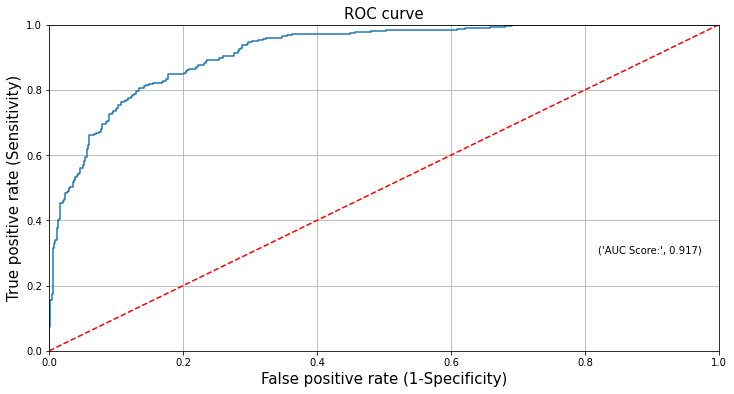

In [97]:
plt.figure(figsize=(12,6))
plot_roc(stack_model)